In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from urllib.request import urlopen
import json
# import plotly.express as px

sns.set_theme()
sns.set_context('talk')

with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

In [3]:
childcare = pd.read_csv("../data/abortion-childcare.csv")
childcare = childcare.drop(columns =["Unnamed: 0"])
paid_leave = pd.read_csv("../data/abortion-paid-leave.csv")
paid_leave = paid_leave.drop(columns=['Unnamed: 0'])
abortion = childcare.merge(paid_leave, how='inner', left_on='State', right_on='State')
abortion = abortion.drop(columns=['Abortion Overview_y'])
abortion = abortion.rename(columns={'Abortion Overview_x':'Abortion Overview'})
abortion["Infant Care %"] = 0
for i in range(len(abortion["Cost of Infant Care as Percent of Women's Median Annual Earningsa,b"])):
    perc = abortion["Cost of Infant Care as Percent of Women's Median Annual Earningsa,b"][i]
    num = perc[0:len(perc)-1]
    abortion["Infant Care %"][i] = float(num)
abortion = abortion.drop(columns=["Cost of Infant Care as Percent of Women's Median Annual Earningsa,b"])

<ipython-input-3-3d3249edb54b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abortion["Infant Care %"][i] = float(num)


In [4]:
abortion.head()

,State,Abortion Overview,Child Care Total Score,Paid Leave Legislation Total Score,Infant Care %
0,Alabama,significantly restricted,1.42,0.0,16
1,Alaska,neither,1.37,0.0,23
2,Arizona,significantly restricted,0.97,0.0,25
3,Arkansas,significantly restricted,1.54,0.0,19
4,California,protected,0.95,2.0,27


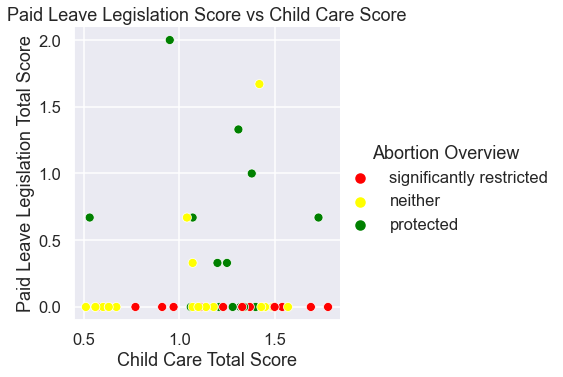

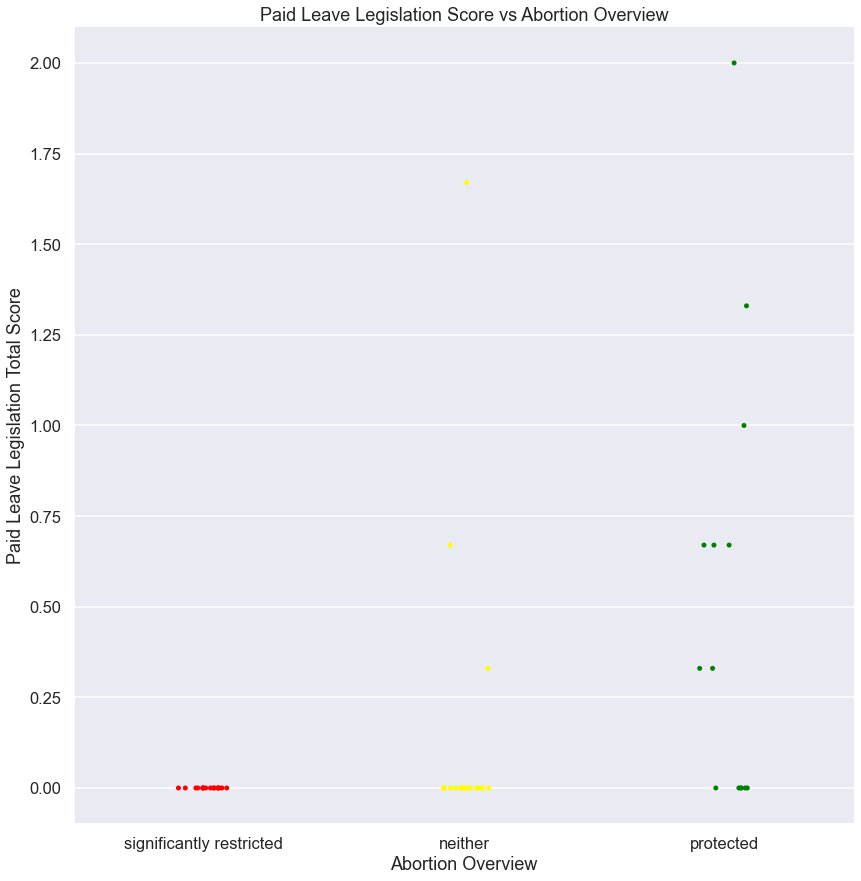

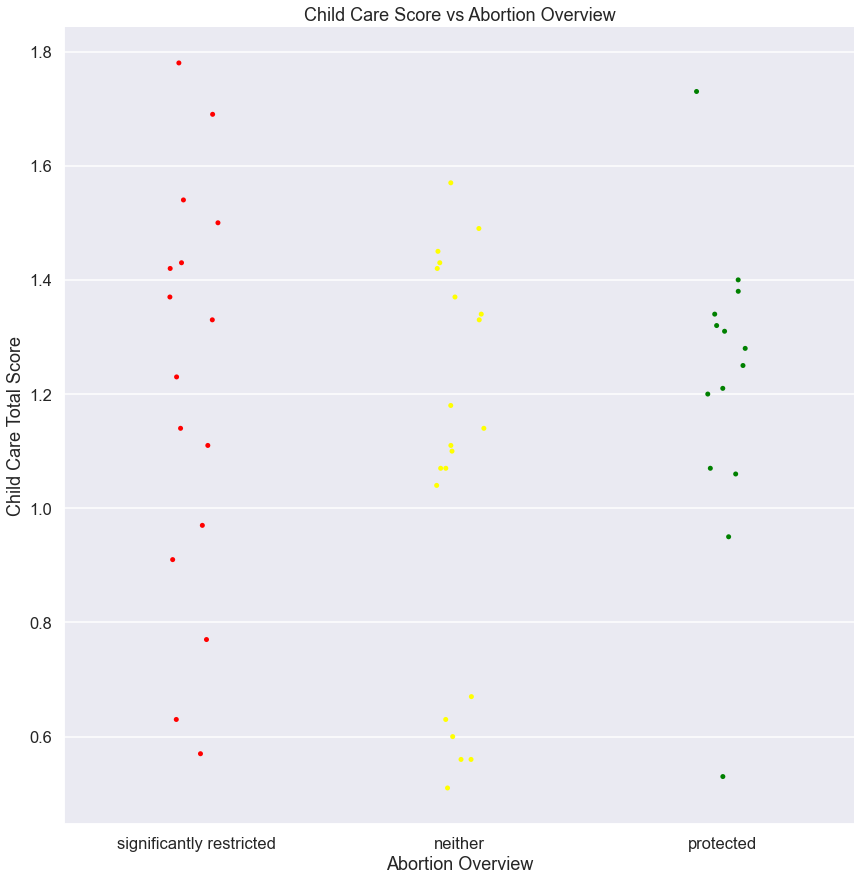

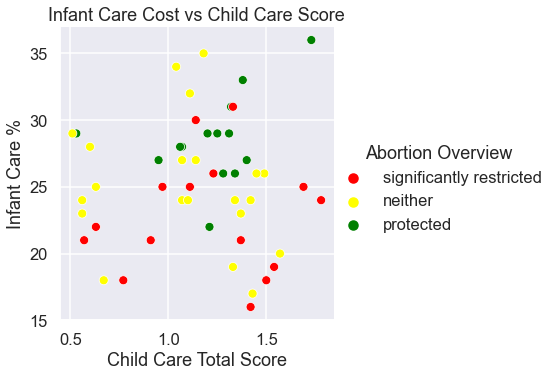

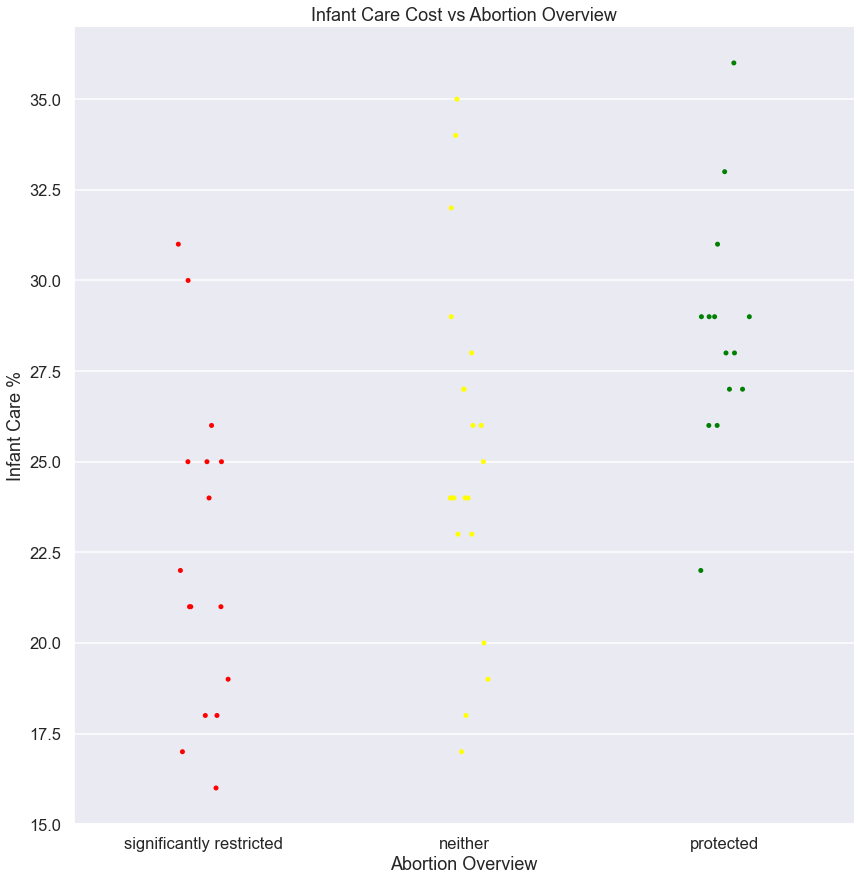

In [5]:
paidleave_vs_childcare = sns.relplot(data=abortion, x = "Child Care Total Score",
                                     y = "Paid Leave Legislation Total Score", hue = "Abortion Overview", 
                                     palette=["red", "yellow", "green"]).set(
                                     title = "Paid Leave Legislation Score vs Child Care Score")
paidleave_vs_abortion = sns.catplot(data=abortion, x = "Abortion Overview", palette=["red", "yellow", "green"],
                                    y = "Paid Leave Legislation Total Score", height=12).set(
                                    title = "Paid Leave Legislation Score vs Abortion Overview")

childcare_vs_abortion = sns.catplot(data=abortion, x = "Abortion Overview", height=12,
                                    y = "Child Care Total Score", palette=["red", "yellow", "green"]).set(
                                    title = "Child Care Score vs Abortion Overview")

careperc_vs_childcare = sns.relplot(data=abortion, x = "Child Care Total Score", 
                                    y = "Infant Care %", hue = "Abortion Overview", 
                                    palette=["red", "yellow", "green"]).set(title = 
                                    "Infant Care Cost vs Child Care Score")
careperc_vs_abortion = sns.catplot(data=abortion, x = "Abortion Overview", y = "Infant Care %", 
                                   palette=["red", "yellow", "green"], height=12).set(
                                    title = "Infant Care Cost vs Abortion Overview")

In [ ]:
# Insurance Stuff - 2018

In [6]:
def fix_data_types(df):
    df["GEOID20"] = 0
    df = df.infer_objects()
    df = df.astype({"statefips": str, "countyfips": str})
    df["countyfips"] = df["countyfips"].apply(lambda x: x.zfill(3))
    df["GEOID20"] = df["statefips"] + df["countyfips"]
    return df

In [7]:
def fix_sahie(df):
    df = fix_data_types(df)
    df = df.drop(columns=["version", "year", "county_name", "Unnamed: 25",
                         "nui_moe", "pctui_moe", "pctic_moe", "pctelig_moe", 
                          "pctliic_moe", "nipr_moe", "nic_moe"])
    df = df[df['racecat'] != '0']
    df = df[df['sexcat'] != '0']
    df = df[df['iprcat'] != '0']
    df = df[df['iprcat'] != '5']
    df['race'] = '0'
    df.loc[(df['racecat']=='1'),'race']='White'
    df.loc[(df['racecat']=='2'),'race']='Black'
    df.loc[(df['racecat']=='3'),'race']='Hispanic'
    df['sex'] = '0'
    df.loc[(df['sexcat']=='1'),'sex']='Male'
    df.loc[(df['sexcat']=='2'),'sex']='Female'
    df['ipr'] = '0'
    df.loc[(df['iprcat']=='1'),'ipr']='<200% poverty'
    df.loc[(df['iprcat']=='2'),'ipr']='<250% poverty'
    df.loc[(df['iprcat']=='3'),'ipr']='<138% poverty'
    df.loc[(df['iprcat']=='4'),'ipr']='<400% poverty'
    df['NUI'] = df['NUI'].astype(int)
    df['NIPR'] = df['NIPR'].astype(int)
    df['NIC'] = df['NIC'].astype(int)
    df["NIC:NUI"] = df["NIC"]/df["NUI"]
    df = df.reset_index()
    df['state_name'] = df['state_name'].str.strip()
    return df

In [8]:
sahie_2018 = pd.read_csv("../raw_data/sahie_2018.csv", header=68, dtype=str)
sahie_2018 = fix_data_types(sahie_2018)
sahie_2018 = fix_sahie(sahie_2018)
sahie_2018.head()

,index,statefips,countyfips,geocat,agecat,racecat,sexcat,iprcat,NIPR,NUI,...,PCTUI,PCTIC,PCTELIG,PCTLIIC,state_name,GEOID20,race,sex,ipr,NIC:NUI
0,25,01,000,40,0,1,1,1,326951,73594,...,22.5,77.5,5.9,20.2,Alabama,01000,White,Male,<200% poverty,3.442631
1,26,01,000,40,0,1,1,2,432794,89238,...,20.6,79.4,7.1,27.4,Alabama,01000,White,Male,<250% poverty,3.849885
2,27,01,000,40,0,1,1,3,200722,49079,...,24.5,75.5,3.9,12.1,Alabama,01000,White,Male,<138% poverty,3.089774
3,28,01,000,40,0,1,1,4,737747,118361,...,16.0,84.0,9.4,49.5,Alabama,01000,White,Male,<400% poverty,5.233024
4,31,01,000,40,0,1,2,1,377849,70489,...,18.7,81.3,5.6,24.4,Alabama,01000,White,Female,<200% poverty,4.360397


In [9]:
state_data = sahie_2018.merge(abortion, how='outer', left_on='state_name', right_on='State')
NUI_means = state_data.groupby("state_name").mean()['NUI']
state_data = state_data.drop(columns=['state_name'])

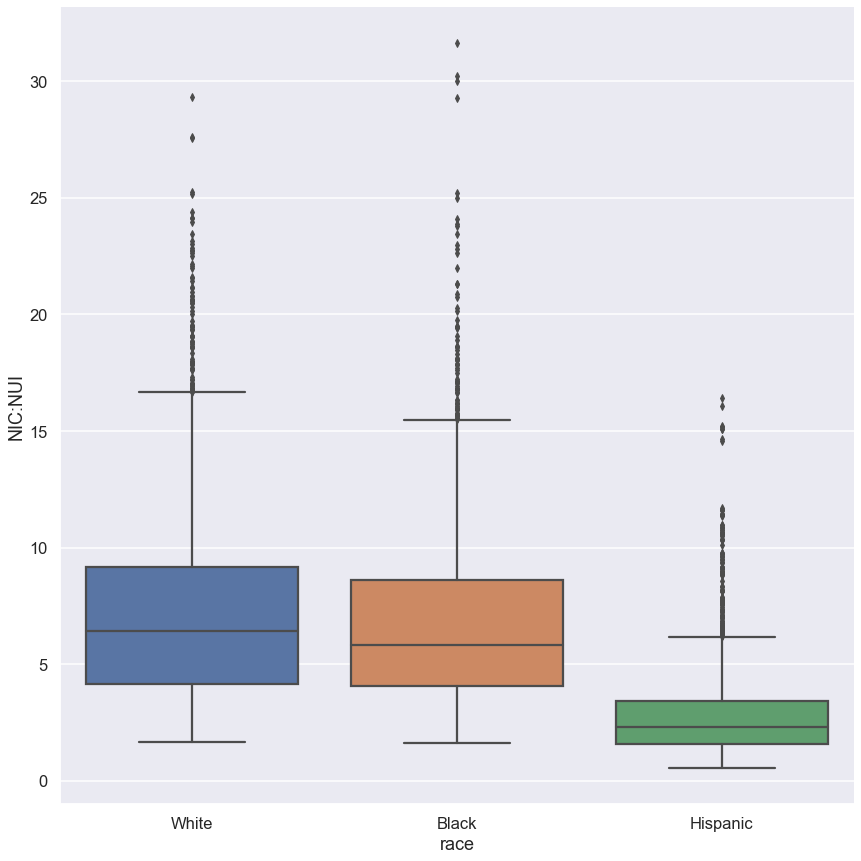

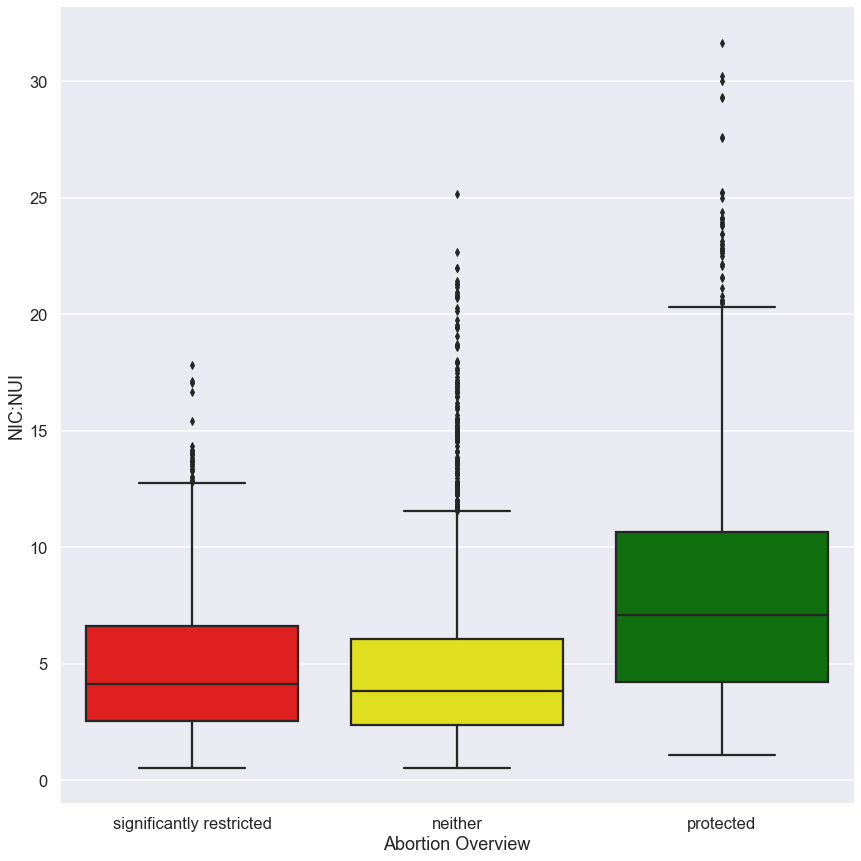

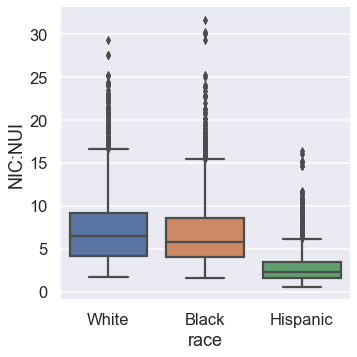

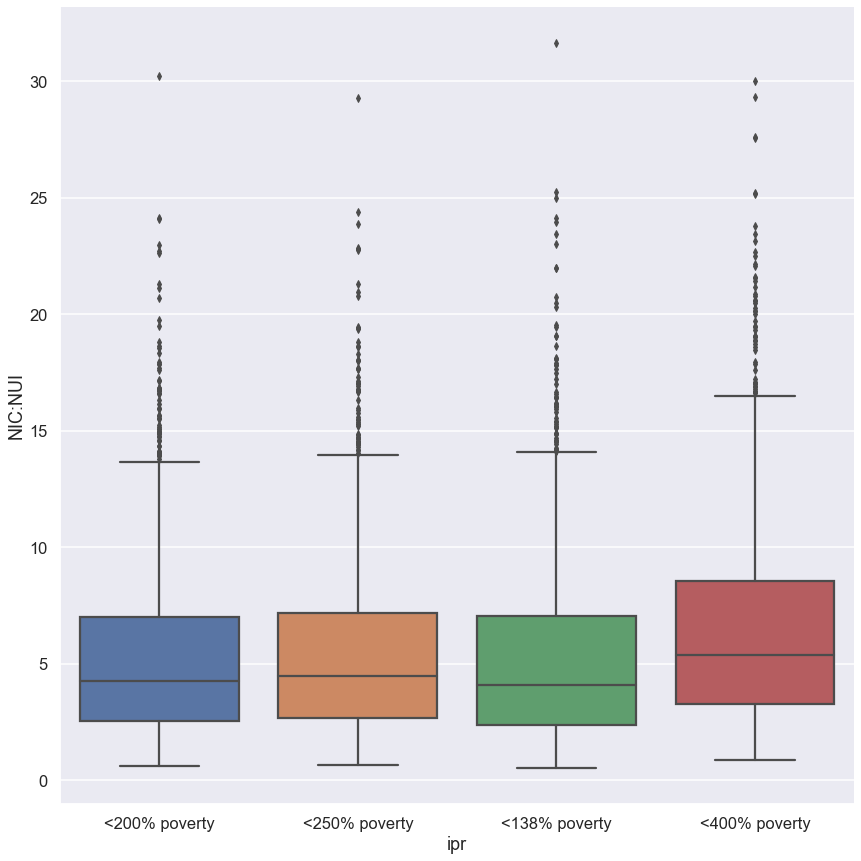

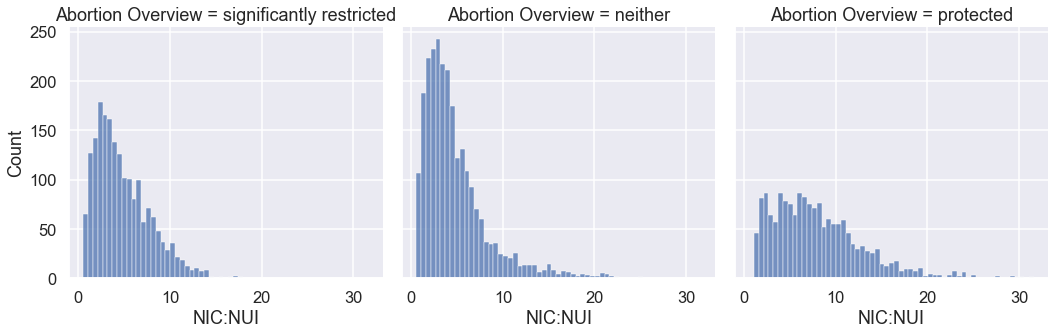

In [10]:
NUI_vs_racecat = sns.catplot(data=state_data, x="race", y="NIC:NUI", height=12, kind="box")
ratio_vs_abortion = sns.catplot(data=state_data, x="Abortion Overview", y = "NIC:NUI", kind="box",
                                palette=['red','yellow','green'], height=12)
ratio_vs_race = sns.catplot(data=state_data, x="race", y = "NIC:NUI", kind="box")
ratio_vs_income = sns.catplot(data=state_data, x="ipr", y = "NIC:NUI", height=12, kind="box")
abortion_vs_ratio = sns.displot(data=state_data, x='NIC:NUI', col='Abortion Overview')

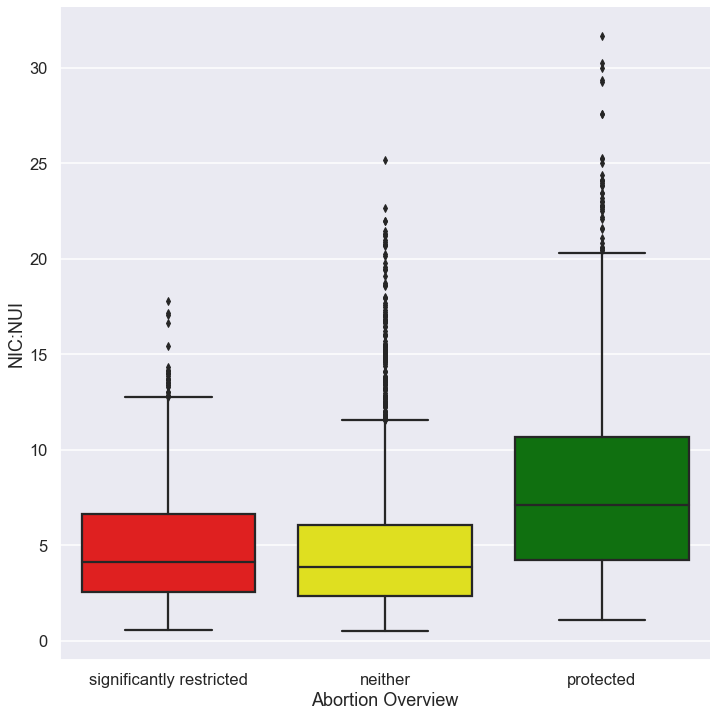

In [11]:
ratio_vs_abortion = sns.catplot(data=state_data, x='Abortion Overview', y='NIC:NUI', kind="box",
                               palette=['red','yellow','green'], height=10)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix

/Users/parkerfaircloth-henise/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Classification Accuracy: 0.4792250233426704


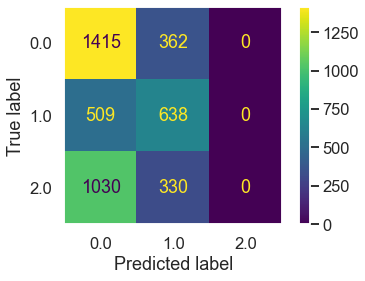

In [13]:
Y = OrdinalEncoder().fit_transform(state_data[["Abortion Overview"]].values)
X = state_data[['NIC:NUI',"iprcat","racecat", "Child Care Total Score", "Paid Leave Legislation Total Score","Infant Care %",'NUI',"NIPR","NIC"]].values
#we split the dataset into a test and training set
train_x, test_x, train_y, test_y = train_test_split(X,Y , test_size=0.7, random_state=0)
clf = LogisticRegression(solver='lbfgs',multi_class='multinomial')
clf.fit(train_x, train_y)
clf.score(test_x, test_y)
metrics.plot_confusion_matrix(clf, test_x, test_y)
plt.grid(False)
print("Classification Accuracy:", clf.score(test_x, test_y))

In [ ]:
# Insurance Changes 2014-2018

In [14]:
sahie_2017 = pd.read_csv("../raw_data/sahie_2017.csv", header=68, dtype=str)
sahie_2017 = fix_data_types(sahie_2017)
sahie_2017 = fix_sahie(sahie_2017)

sahie_2016 = pd.read_csv("../raw_data/sahie_2016.csv", header=68, dtype=str)
sahie_2016 = fix_data_types(sahie_2016)
sahie_2016 = fix_sahie(sahie_2016)

sahie_2015 = pd.read_csv("../raw_data/sahie_2015.csv", header=68, dtype=str)
sahie_2015 = fix_data_types(sahie_2015)
sahie_2015 = fix_sahie(sahie_2015)

sahie_2014 = pd.read_csv("../raw_data/sahie_2014.csv", header=68, dtype=str)
sahie_2014 = fix_data_types(sahie_2014)
sahie_2014 = fix_sahie(sahie_2014)

In [15]:
sahie_1415 = pd.merge(sahie_2014[['state_name','index','NIC:NUI','GEOID20']],sahie_2015[['index','NIC:NUI']],on='index')
sahie_1415 = sahie_1415.rename(columns={"NIC:NUI_x":"NIC:NUI 2014", "NIC:NUI_y":"NIC:NUI 2015"})

sahie_1416 = pd.merge(sahie_1415,sahie_2016[['NIC:NUI','index']],on='index')
sahie_1416 = sahie_1416.rename(columns={"NIC:NUI":"NIC:NUI 2016"})

sahie_1417 = pd.merge(sahie_1416,sahie_2017[['NIC:NUI','index']],on='index')
sahie_1417 = sahie_1417.rename(columns={"NIC:NUI":"NIC:NUI 2017"})

sahie = pd.merge(sahie_1417,sahie_2018[['NIC:NUI','index']],on='index')
sahie = sahie.rename(columns={"NIC:NUI":"NIC:NUI 2018"})

sahie['overall NIC:NUI change'] = sahie['NIC:NUI 2018'] - sahie['NIC:NUI 2014']

In [17]:
sahie_abortion = pd.merge(sahie, abortion[['Abortion Overview', 'Infant Care %', 'Child Care Total Score', 
                                           'Paid Leave Legislation Total Score', 'State']], 
                                            left_on=['state_name'], right_on='State')
sahie_abortion = sahie_abortion.drop(columns=['state_name'])
sahie_abortion.head()

,index,NIC:NUI 2014,GEOID20,NIC:NUI 2015,NIC:NUI 2016,NIC:NUI 2017,NIC:NUI 2018,overall NIC:NUI change,Abortion Overview,Infant Care %,Child Care Total Score,Paid Leave Legislation Total Score,State
0,25,3.069276,01000,3.750785,4.311649,3.994788,3.442631,0.373355,significantly restricted,16,1.42,0.0,Alabama
1,26,3.407765,01000,4.147118,4.826590,4.445867,3.849885,0.442119,significantly restricted,16,1.42,0.0,Alabama
2,27,2.776449,01000,3.327437,3.769024,3.483247,3.089774,0.313325,significantly restricted,16,1.42,0.0,Alabama
3,28,4.564398,01000,5.567200,6.509217,5.955724,5.233024,0.668626,significantly restricted,16,1.42,0.0,Alabama
4,31,3.402441,01000,4.461394,4.691746,4.508381,4.360397,0.957956,significantly restricted,16,1.42,0.0,Alabama


In [18]:
sahie_abortion_cutdown = sahie_abortion[['State', 'Abortion Overview', 'Infant Care %',
                                        'Child Care Total Score', 'Paid Leave Legislation Total Score']].copy()
sahie_abortion_cutdown = sahie_abortion_cutdown.drop_duplicates()
sahie_abortion_cutdown = sahie_abortion_cutdown.reset_index()
sahie_abortion_cutdown['Average NIC:NUI Change'] = 0.0
prev_state='Alabama'
vals = []
k=0
for i in range(len(sahie_abortion['State'])):
    this_state=sahie_abortion['State'][i]
    if this_state == prev_state:
        vals.append(sahie_abortion['overall NIC:NUI change'][i])
    else:
        avg = sum(vals) / len(vals)
        sahie_abortion_cutdown['Average NIC:NUI Change'][k] = avg
        vals = []
        k=k+1
        prev_state=this_state
        vals.append(sahie_abortion['overall NIC:NUI change'][i])
    if i == len(sahie_abortion['State']) - 1:
        avg = sum(vals) / len(vals)
        sahie_abortion_cutdown['Average NIC:NUI Change'][k] = avg

sahie_abortion_cutdown = sahie_abortion_cutdown.sort_values(by='Average NIC:NUI Change', ascending=False)

<ipython-input-18-8294c8876978>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sahie_abortion_cutdown['Average NIC:NUI Change'][k] = avg
<ipython-input-18-8294c8876978>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sahie_abortion_cutdown['Average NIC:NUI Change'][k] = avg


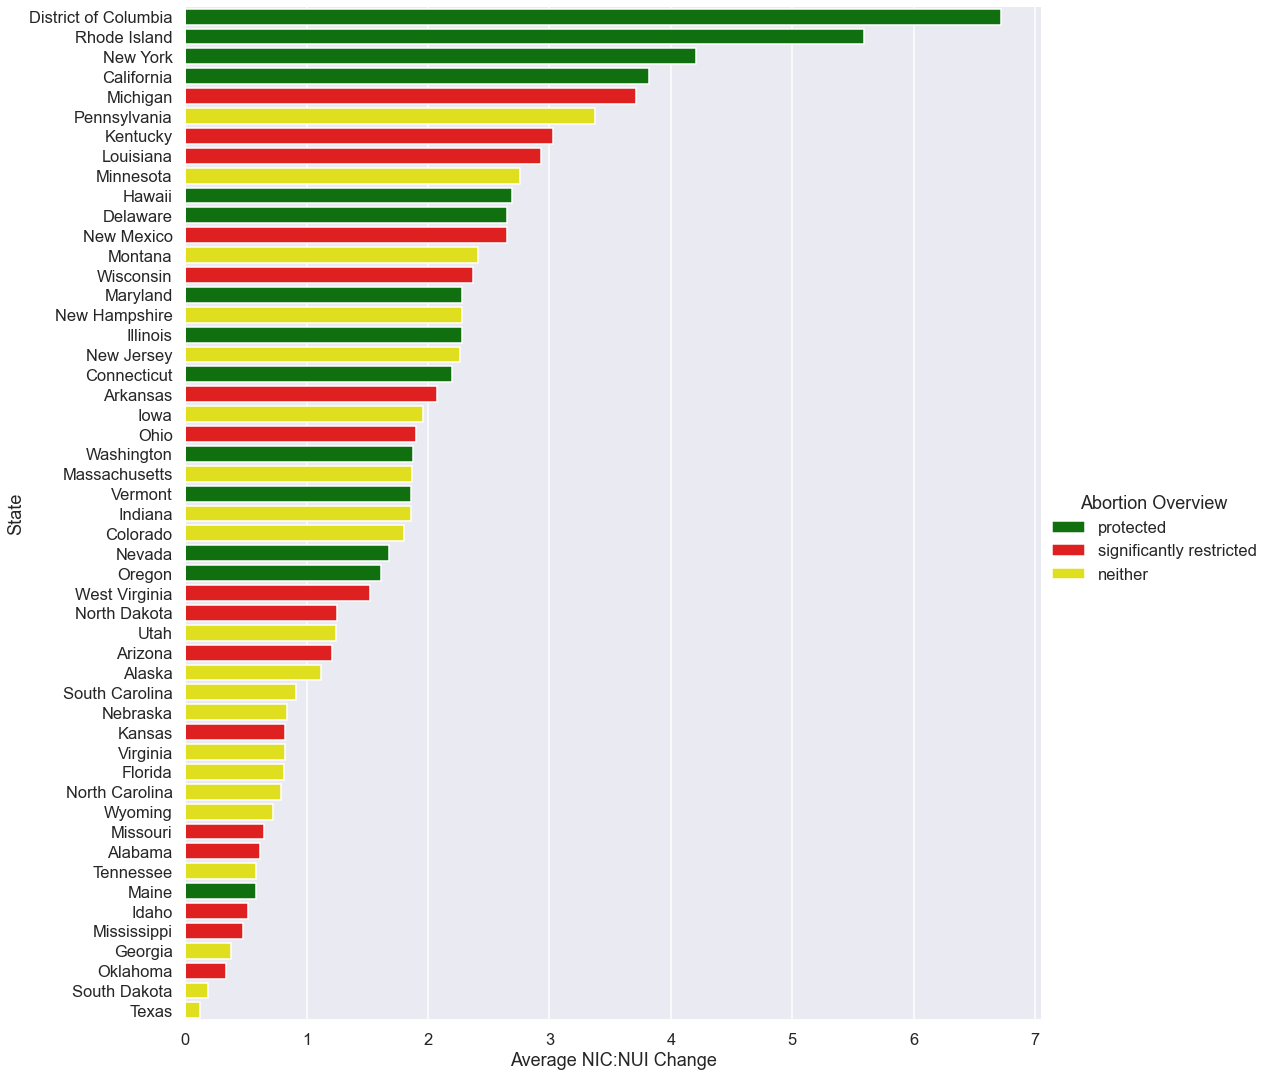

In [19]:
state_vs_change = sns.catplot(data=sahie_abortion_cutdown, y='State', x='Average NIC:NUI Change', kind='bar', 
                              hue='Abortion Overview', height=15, dodge=False, palette=["green", "red", "yellow"])

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

protected = sahie_abortion_cutdown[sahie_abortion_cutdown['Abortion Overview'] == 'protected']
neither = sahie_abortion_cutdown[sahie_abortion_cutdown['Abortion Overview'] == 'neither']
restricted = sahie_abortion_cutdown[sahie_abortion_cutdown['Abortion Overview'] == 'significantly restricted']
linear_model = LinearRegression()


data1 = protected[['Average NIC:NUI Change']].values
target1 = protected['Infant Care %'].values
target2 =  protected['Child Care Total Score'].values
linear_model.fit(X=data1, y=target1)
protected['Predicted Infant Care %'] = linear_model.predict(data1)
linear_model.fit(X=data1, y=target2)
protected['Predicted Child Care Score'] = linear_model.predict(data1)

data2 = restricted[['Average NIC:NUI Change']].values
target3 = restricted['Infant Care %'].values
target4 = restricted['Child Care Total Score'].values
linear_model.fit(X=data2, y=target3)
restricted['Predicted Infant Care %'] = linear_model.predict(data2)
linear_model.fit(X=data2, y=target4)
restricted['Predicted Child Care Score'] = linear_model.predict(data2)

data3 = neither[['Average NIC:NUI Change']].values
target5 = neither['Infant Care %'].values
target6 = neither['Child Care Total Score']
linear_model.fit(X=data3, y=target5)
neither['Predicted Infant Care %'] = linear_model.predict(data3)
linear_model.fit(X=data3, y=target6)
neither['Predicted Child Care Score'] = linear_model.predict(data3)

<ipython-input-24-ec027044328f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  protected['Predicted Infant Care %'] = linear_model.predict(data1)
<ipython-input-24-ec027044328f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  protected['Predicted Child Care Score'] = linear_model.predict(data1)
<ipython-input-24-ec027044328f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

Infant Care Protected r^2: 0.3643893926951737
Infant Care Restricted r^2: 0.0004268850826987247
Infant Care Neither r^2: 0.4153642598289775
Child Care Score Protected r^2: 0.13338448450654028
Child Care Score Restricted r^2: 0.08925816787633134
Child Care Score Neither r^2: 0.03063659647119621


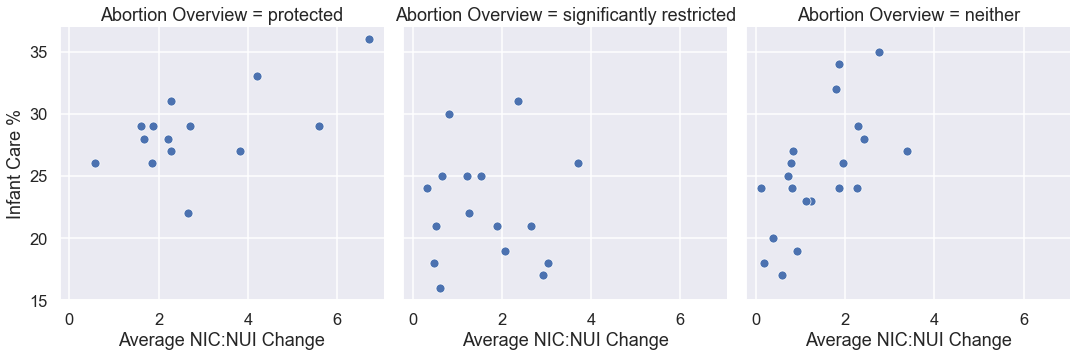

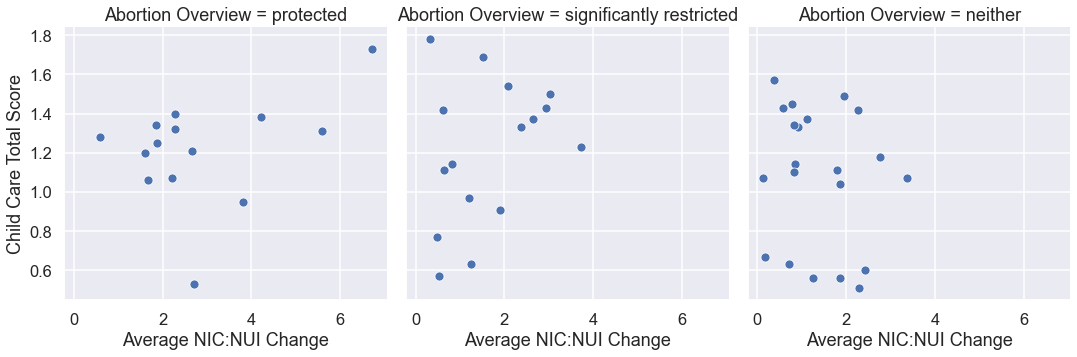

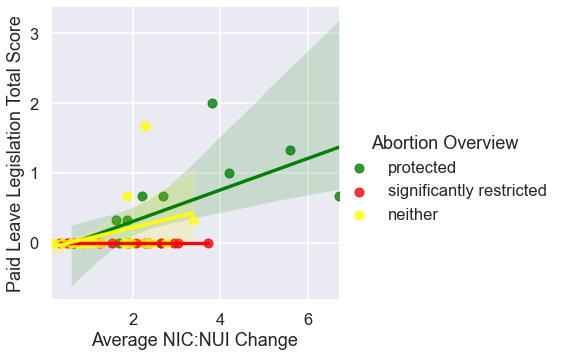

In [25]:
careperc_vs_change = sns.relplot(data=sahie_abortion_cutdown, x='Average NIC:NUI Change', y='Infant Care %', col='Abortion Overview')
childcare_vs_change = sns.relplot(data=sahie_abortion_cutdown, x='Average NIC:NUI Change', y='Child Care Total Score', col='Abortion Overview')
paidleave_vs_change = sns.lmplot(data=sahie_abortion_cutdown, x='Average NIC:NUI Change', y='Paid Leave Legislation Total Score', hue='Abortion Overview', palette=["green", "red", "yellow"])


print("Infant Care Protected r^2:", r2_score(protected['Infant Care %'].values, protected['Predicted Infant Care %'].values))
print("Infant Care Restricted r^2:", r2_score(restricted['Infant Care %'].values, restricted['Predicted Infant Care %'].values))
print("Infant Care Neither r^2:", r2_score(neither['Infant Care %'].values, neither['Predicted Infant Care %'].values))


print("Child Care Score Protected r^2:", r2_score(protected['Child Care Total Score'].values, protected['Predicted Child Care Score'].values))
print("Child Care Score Restricted r^2:", r2_score(restricted['Child Care Total Score'].values, restricted['Predicted Child Care Score'].values))
print("Child Care Score Neither r^2:", r2_score(neither['Child Care Total Score'].values, neither['Predicted Child Care Score'].values))



In [ ]:
change_vs_abortion = sns.catplot(data=sahie_abortion_cutdown, x='Abortion Overview', y='Average NIC:NUI Change',
                                 palette=['green','red','yellow'], kind="box", height=10)

In [ ]:
df = pd.read_csv('https://gist.githubusercontent.com/shinokada/f01139d3a024de375ede23cec5d52360/raw/424ac0055ed71a04e6f45badfaef73df96ad0aad/CrimeStatebyState_1960-2014.csv')
df = df[(df['State']!= 'District of Columbia' )]

state_ab= df[['State', 'State_code']].drop_duplicates()
state_ab.head()

sahie_abortion = pd.merge(state_ab, sahie_abortion, left_on=['State'], right_on=['State'])

In [ ]:
sahie_abortion.head()

In [ ]:
abortion_map = px.choropleth(sahie_abortion, locations='State_code', 
                    color='Abortion Overview', locationmode = 'USA-states', scope="usa")
abortion_map.show()

In [ ]:
ratiochange_map = px.choropleth(sahie_abortion, locations='State_code', range_color=(0,2),
                    color='overall NIC:NUI change', locationmode = 'USA-states', scope="usa")
ratiochange_map.show()

In [ ]:
infantcare_map = px.choropleth(sahie_abortion, locations='State_code', 
                    color='Infant Care %', locationmode = 'USA-states', scope="usa")
infantcare_map.show()